# Exploring Normal Distribution With Jupyter Notebook

This is almost entirly from: https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8

except the examples and few additional explanatory texts here and there. 

With thanks to Shinichi Okada for writing this great article. 

In this class, we are going to work through this Jupyter notebook to get a better understanding of normal distributions using scipy. Make sure you go through every example and answer the questions. 

# Imports

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Normal Distribution Probability Density Function

The probability density function (PDF) of the normal distribution is:

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{x-\mu}{2\sigma ^2}}$ where $x \in \mathbb{R}$

The random variable 𝑋 described by the PDF is a normal variable that follows a normal distribution with mean $\mu$ and variance $\sigma$.

Normal distribution notation is: $X \sim N(\mu, \sigma ^2)$

The area under the curve equals 1.

$$\int \limits _{-\infty} ^{+\infty}f(x)dx=1$$

norm.pdf returns a PDF value. The following is the PDF value when $𝑥=1$, $\mu=0$, $\sigma=1$.

In [2]:
norm.pdf(x=1.0, loc=0, scale=1)

0.24197072451914337

### Example 1

Find the PDF value for a normal distribution when $𝑥=0$, $\mu=0$, $\sigma=1$

In [3]:
#insert your code here
norm.pdf(x=0.0, loc=0, scale=1)

0.3989422804014327

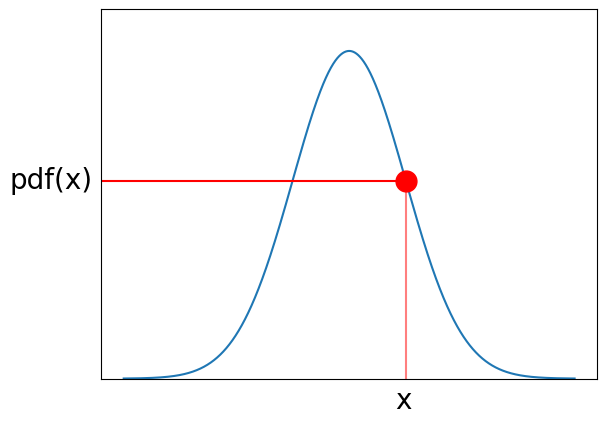

In [4]:
#The graph displaying the norm.pdf function returning PDF value for a given x

fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45) # range
ax.axhline(y=0.24,xmax=0.61,color='r') # horizontal line
ax.axvline(x=1, ymax=0.53, color='r',alpha=0.5) # vertical line
xplot = ax.plot([1], [0.24], marker='o', markersize=15, color="red") # coordinate point
ax.set_yticks([]) # remove y axis label
ax.set_xticks([]) # remove x axis label
ax.set_xlabel('x',fontsize=20) # set x label
ax.set_ylabel('pdf(x)',fontsize=20,rotation=0) # set y label
ax.xaxis.set_label_coords(0.61, -0.02) # x label coordinate
ax.yaxis.set_label_coords(-0.1, 0.5) # y label coordinate
plt.show()

Since `norm.pdf` returns a PDF value, we can use this function to plot the normal distribution function. We graph a PDF of the normal distribution using `scipy`, `numpy` and `matplotlib`. We use the domain of $−4< x <4$, the range of $0<f(x)<0.45$, the default values $\mu=0$ and $\sigma=1$. `plot(x-values,y-values)` produces the graph.

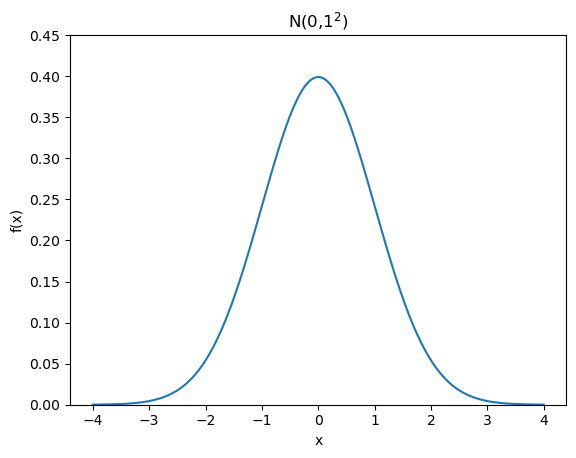

In [5]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()

A normal curve is smooth bell-shaped. It is symmetrical about the $x=\mu$ and has a maximum point at $x=\mu$.

## Normal distribution PDF with different standard deviations

Let’s plot the probability distribution functions of a normal distribution where the mean has different standard deviations.

`scipy.norm.pdf` has keywords, `loc` and `scale`. The location (`loc`) keyword specifies the mean and the scale (`scale`) keyword specifies the standard deviation.

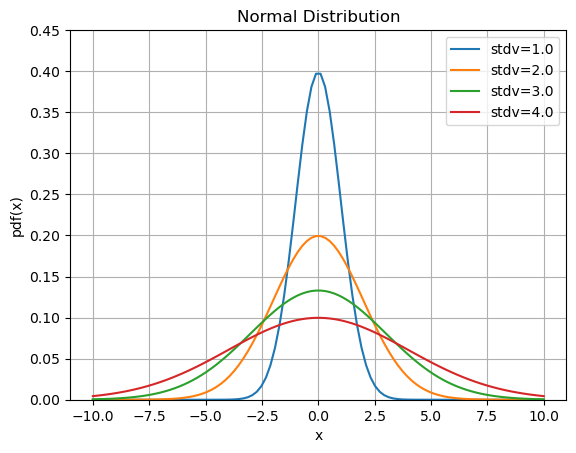

In [6]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

## Normal distribution PDF with different means
Let’s plot probability distribution functions of normal distribution where the standard deviation is 1 and different means.

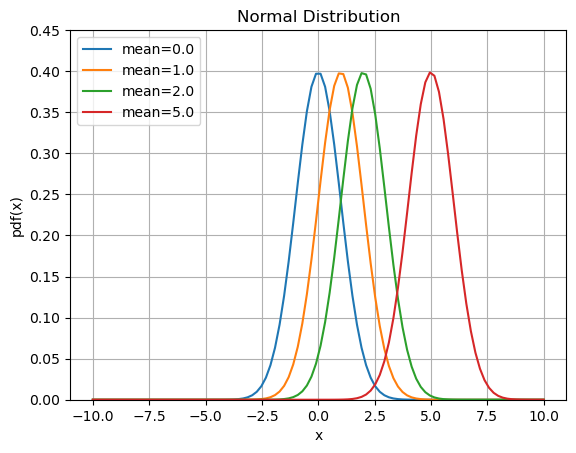

In [7]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)


The mean of the distribution determines the location of the center of the graph. As you can see in the above graph, the shape of the graph does not change by changing the mean, but the graph is translated horizontally.

### Example 2:

Graph PDF of $X \sim N(-1, 4)$ 

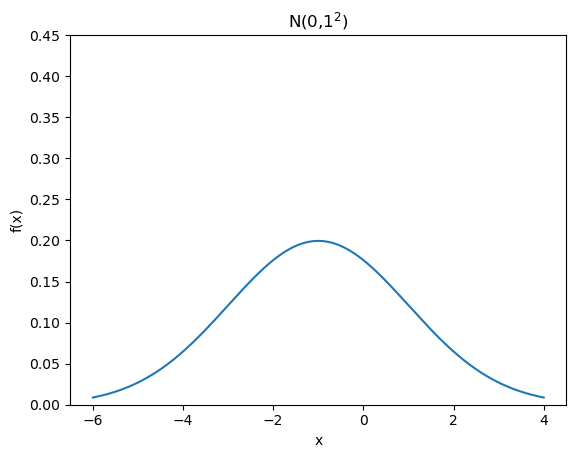

In [8]:
#insert your code here
fig, ax = plt.subplots()
x= np.arange(-6,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x,loc=-1,scale=2))
ax.set_ylim(0,0.45)
plt.show()

## Using random normal distribution values

`norm.rvs` generates random normal distribution numbers according to the `scale` which is the standard deviation, the `loc` which is the mean and the size. We create a histogram for the generated numbers and add the PDF.

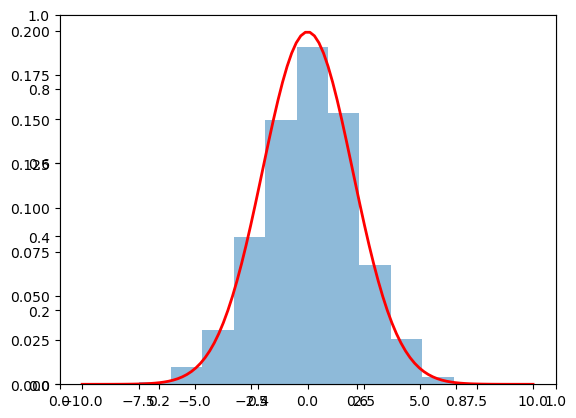

In [9]:
fig, ax = plt.subplots()
xs = norm.rvs(scale=2,size=1000)
x = np.linspace(-10,10,100)
p = norm.pdf(x,scale=2) ## gives the curve
v = np.var(xs)
m = np.mean(xs)
ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, density=True)
ax.plot(x,p, 'r-', lw=2)

#ax.set_xlabel('x')
#ax.set_ylabel('pdf(x)')

#ax.set_title(f'mean={m:.2f}, var={v:.2f}')
#ax.grid(True)


You will work on the above example more in the lab.

## A cumulative normal distribution function
The cumulative distribution function of a random variable $X$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. Since the normal distribution is a continuous distribution, the shaded area of the curve represents the probability that $X$ is less or equal to $x$.

$$P(X \leq x)=F(x)=\int \limits _{-\infty} ^{x}f(t)dt \text{, where }x\in \mathbb{R}$$

Using `fill_between(x, y1, y2=0)` fill up the area between two curves `y1` and `y2` which has the default is 0.

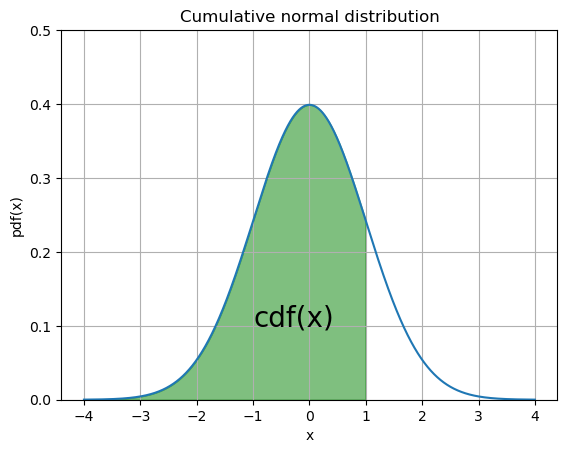

In [10]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

# Calculating probability of normal distribution
 
Given the mean of 3 and the standard deviation of 2,  we can find the probability of $P(X<2)$.
 
$$X \sim N(3,2^2)$$
 
In `norm.cdf`, the location (`loc`) keyword specifies the mean and the scale (`scale`) keyword specifies the standard deviation.

In [11]:
lessthan2=norm.cdf(x=2, loc=3, scale=2)
print(lessthan2)

0.3085375387259869


NameError: name 'D' is not defined

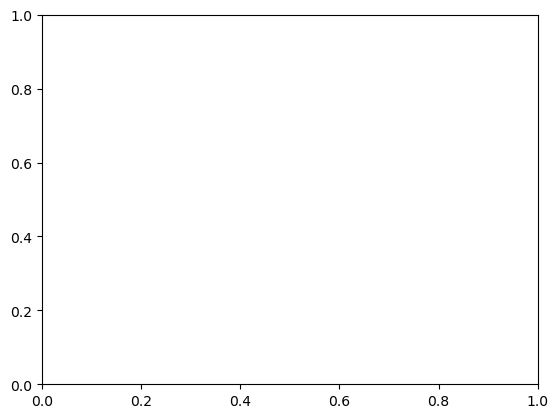

In [12]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
D
# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
# for text
ax.text(-0.5,0.02,round(lessthan2,2), fontsize=20)
plt.show()

## Interval between variables
 
To find the probability of an interval between certain variables, you need to subtract `cdf` from another `cdf`. Let's find $P(0.5<X<2)$ with a mean of 1 and a standard deviation of 2.
 
$$X \sim N(1,2^2)$$

In [ ]:
norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)


In [ ]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

To find the probability of $P(X>4)$, we can use `sf` which is called the survival function and it returns `1-cdf`. For example, `norm.sf(x=4, loc=3, scale=2` returns the probability which is greater than $x=4, P(X>4)$ when $\mu=4, \sigma=2$.


In [ ]:
gr4sf=norm.sf(x=4, loc=3, scale=2)
gr4sf

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
ax.text(4.5,0.02,"sf(x) %.2f" %(gr4sf), fontsize=20)
plt.show()


The above graph is the same as $1-P(X<4)$.

In [ ]:
gr4=norm.cdf(x=4, loc=3, scale=2)
gr14=1-gr4
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
px1=np.arange(-4,4,0.01)
ax.fill_between(px1,norm.pdf(px1,loc=3,scale=2),alpha=0.5, color='r')
ax.text(4.5,0.02,round(gr14,2), fontsize=20)
ax.text(1,0.02,round(gr4,2), fontsize=20)
plt.show()


### Example 3:

Draw 3 graphs which displays the `cdf` between one, two, and three standard deviations from the mean for 

$$X \sim N(0,1)$$

In [ ]:
# insert your code here

### Example 4:

Draw 3 graphs which displays the `cdf` between one, two, and three standard deviations from the mean for 

$$X \sim N(1,3^2)$$

In [ ]:
# insert your code here

### Example 5:

What do you notice from examples 3 and 4?

# Finding quantiles

$k$ in $P(X \leq k)=0.95$ is known as quantile, in this case the 95% quantile.

## Percent point function

`ppf` is the inverse of `cdf` and it is called Percent point function.
Given the mean of 1 and the standard deviation of 3, we can find the quantile `a` in $P(X<a)=0.506$ by using `ppf`. 

$$X \sim N(1,3^2)$$

In [ ]:
norm.ppf(q=0.506, loc=1, scale=3)


In [ ]:
fig, ax = plt.subplots()
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=3))
ax.set_title("N(1,$3^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
xpoint=norm.ppf(q=0.506, loc=1, scale=3)
px=np.arange(-10,xpoint,0.01)
ax.set_ylim(0,0.15)
ax.fill_between(px,norm.pdf(px,loc=1,scale=3),alpha=0.5, color='g')
ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=0.506", fontsize=20)
plt.show()


## Inverse survival function



With the same mean and standard deviation, we can find the quantile `b` in $P(X>b)=0.198$ using the inverse survival function `isf`. This is the same as using `ppf` with $q=(1-0.198)$.
 
$$X \sim N(1,3^2)$$

In [ ]:
norm.isf(q=0.198, loc=1, scale=3)

In [ ]:
norm.ppf(q=(1-0.198), loc=1, scale=3)

## Interval around the mean

`norm.interval` returns endpoints of the range that contains alpha percent of the distribution. For example, with a mean of 0 and a standard deviation of 1 to find 95% of the probability, `norm.interval` returns x values around the mean, in this case, $\mu=0$.
 
$$X \sim N(0,1^2)$$

In [ ]:
a,b = norm.interval(confidence=0.95, loc=0, scale=1)
print(a,b)

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Interval")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(a,b,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
ax.text(-0.5,0.1,"0.95", fontsize=20)
plt.show()


# Standard normal distribution
 
When $\mu=0$ and variance=1, it is called the standard normal distribution. The above probability function is simplified to:
 
$$
\Phi(x)=\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}\\
Z \sim N(0,1)
$$
 
All normal curves can be related to the standard normal distribution. 

## Standardized normal variable
 
To standardize a random variable $X \sim N(\mu, \sigma^2)$ into the standardized normal variable $Z \sim N(0,1)$ we use the transformation:
 
$$
Z=\frac{x-\mu}{\sigma}
$$
 
The standardized value Z tells how many standard deviations below or above the mean the original value is.

## Finding the standard normal value

For example, to find the standardized value for $x=1$ when a mean of 2 and a standard deviation of 3.

$$
\text{For }X \sim N(2,3^2)\\
Z=\frac{1-2}{3}
$$

We can use `norm.cdf` to find the probability and use `norm.ppf` with $\mu=0, \sigma=1$ to find the standardized value.

In [ ]:
norm.cdf(1, loc=2, scale=3)

In [ ]:
norm.ppf(q=norm.cdf(1, loc=2, scale=3))

### Example 6:

One example of a variable that has a Normal distribution is IQ. In the population, the mean IQ is 100 and it standard deviation, depending on the test, is 15 or 16. Let's assume it is 15 for this example. 

Answer the following questions:

1. What does the score of 150 signify? What percentage of the population are expected to score above 150? 
2. What score would mean someone is in the lowest 10% on this scale? 

